## Домашнее задание №4

***

### Бортников Павел Павлович 20215

***

### Классификация

Вам предложен набор с признаками съедобных и несъедобных грибов.  
Набор разбит на две части:  
- тренировочный griby_train.csv
- тестовый griby_test.csv

**Задача:**  
1. загрузить данные
2. провести разведочный анализ данных:
    * определить количество признаков
    * определить тип признаков
    * проверить на наличие пропущенных значений
    * визуализировать данные - распределение по категориям для съедобных и несъедобных грибов
    * построить графики с помощью какого-либо из методов снижения размерности, например, метода главных компонент
3. построить классификатор, который как можно более точно предсказывает съедобность грибов на основе предложенных признаков с помощью:  
    * логистической регрессии
    * метода опорных векторов (для SVM важно проводить подбор гиперпараметров)
    * решающего дерева (и визуализировать дерево)
    * градиентного бустинга
4. для метода опорных векторов провести подбор оптимальных параметров
5. оценить качество полученных моделей с использованием тестового набора (accuracy, ROC AUC), построить графики для визуализации качества предсказаний 
6. оценить важность признаков
    
Чтобы получить 5 баллов, достаточно выполнить пункты 1 и 2, построить классификатор хотя бы с помощью одного метода и выполнить пункт 5.  
Чтобы получить все 8 баллов, нужно выполнить все пункты заданий 1-6.  
Нужно быть готовым ответить на вопросы по вашему варианту решения.

Задание сдавать в виде jupyter-ноутбуков (\*.ipynb) или в виде скрипта в формате \*.py  

**ВАЖНО!!!**
- Код должен быть рабочим.  
- Помните про воспроизводимость &mdash; фиксируйте random-state везде, где необходимо.  
- Помните про переобучение! ***Обучаться на всем наборе данных, включая тестовый &mdash; плохая идея, качество ваших предсказаний я буду проверять на другом наборе данных! ***


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import os
# os.chdir('/content/drive/My Drive/Classroom/Методы машинного обучения/DA_ML_20/ДЗ/Mushrooms')

In [4]:
import numpy as np

import matplotlib.pyplot as plt # библиотека для построения графиков
import seaborn as sns # библиотека для построения графиков

from sklearn import preprocessing, decomposition, manifold, model_selection, pipeline, cluster, datasets, mixture, metrics

from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

from sklearn.svm import LinearSVC, SVC

from IPython.display import Image

%matplotlib inline 

In [5]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# with open('../../images/f4f4a14e77deb7c5bbde53ce7d6ce82b.gif','rb') as f:
#     Image(data=f.read(), format = 'png')

### 1. Загрузка данных

In [6]:
## read test and train datasets:
data_train = pd.read_csv("./hwfiles/griby_train.csv")
data_test  = pd.read_csv("./hwfiles/griby_test.csv")
data_train

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,flat,scaly,brown,no,spicy,free,close,narrow,buff,...,silky,white,pink,partial,white,one,evanescent,white,several,leaves
1,poisonous,convex,scaly,yellow,no,foul,free,close,broad,gray,...,silky,buff,pink,partial,white,one,large,chocolate,several,grasses
2,edible,convex,fibrous,brown,bruises,none,free,close,broad,pink,...,smooth,pink,gray,partial,white,one,pendant,brown,solitary,woods
3,poisonous,convex,smooth,red,no,spicy,free,close,narrow,buff,...,silky,pink,pink,partial,white,one,evanescent,white,several,woods
4,edible,convex,fibrous,red,bruises,none,free,close,broad,brown,...,smooth,white,gray,partial,white,one,pendant,black,solitary,woods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,poisonous,convex,scaly,red,no,fishy,free,close,narrow,buff,...,smooth,white,white,partial,white,one,evanescent,white,several,leaves
2100,poisonous,flat,smooth,white,bruises,foul,free,close,broad,pink,...,smooth,white,white,partial,white,one,pendant,chocolate,scattered,grasses
2101,poisonous,convex,smooth,brown,no,fishy,free,close,narrow,buff,...,silky,pink,pink,partial,white,one,evanescent,white,several,leaves
2102,edible,convex,fibrous,white,no,none,free,crowded,broad,pink,...,smooth,white,white,partial,white,one,evanescent,brown,scattered,grasses


### 2. Разведочный анализ данных

In [7]:
## проверка на наличие пропущенных значений
dtr = data_train.replace("?", pd.NA)
cnt = 0

for col in dtr.columns:
    for idx, val in enumerate(pd.isna(dtr[col])):
        if val: print(idx, col); cnt+=1
print("---", cnt, "--- ROWS WITH NA")

# есть 3 варианта дальнейшей работы:
# 1) Просто выкинуть колонку stalk_root и потерять 1 признак
# 2) Выкинуть все ряды с NA и потерять 614 рядов
# 3) Попробовать импутировать данные. Но поскольку я таким не занимался, и вряд ли сделаю это правильно с первого раза, то лучше и не делать вообще.
# 4) Вариант - в котором я крайне сомневаюсь: попробовать пихнуть unknown как отдельную классификацию по stalk_root

# Для корректной оценки - что выгоднее потерять: 1 колонку или 614 рядов, по-хорошему надо посмотреть вес (важность) признака и отклонения точности при потере того или иного. Но поскольку мне честно лень этим заниматься, я могу голословно предположить, что потерять 30% данных - это страшнее чем один признак.
#
#
# !!! (но дальше я вообще ничего не трогаю в data_train_X, и видимо иду по 4 варианту развития, и по сути тут вообще без разницы, уйдет колонка или 30% данных - все получилось сильно точным)

dtc = dtr.dropna(axis=1)

0 stalk_root
3 stalk_root
6 stalk_root
9 stalk_root
16 stalk_root
18 stalk_root
26 stalk_root
31 stalk_root
32 stalk_root
37 stalk_root
40 stalk_root
42 stalk_root
47 stalk_root
51 stalk_root
57 stalk_root
58 stalk_root
60 stalk_root
62 stalk_root
63 stalk_root
69 stalk_root
70 stalk_root
80 stalk_root
83 stalk_root
96 stalk_root
100 stalk_root
101 stalk_root
103 stalk_root
105 stalk_root
106 stalk_root
111 stalk_root
124 stalk_root
129 stalk_root
132 stalk_root
137 stalk_root
141 stalk_root
143 stalk_root
145 stalk_root
146 stalk_root
148 stalk_root
154 stalk_root
156 stalk_root
158 stalk_root
168 stalk_root
171 stalk_root
176 stalk_root
178 stalk_root
181 stalk_root
182 stalk_root
194 stalk_root
197 stalk_root
203 stalk_root
211 stalk_root
214 stalk_root
216 stalk_root
217 stalk_root
218 stalk_root
220 stalk_root
221 stalk_root
223 stalk_root
226 stalk_root
233 stalk_root
236 stalk_root
238 stalk_root
244 stalk_root
245 stalk_root
247 stalk_root
249 stalk_root
250 stalk_root
253 stal

In [8]:
## сколько в датасете параметров? Признак class является целевым.

data_train.columns[1:].size

22

In [9]:
## для каждого признака вывести количество наблюдений для каждой категории
## например, с помощью метода value_counts
for col in dtc.columns:
    print(f"\n\nColumn --- {col} ---")
    print(dtc[col].value_counts())



Column --- class ---
edible       1133
poisonous     971
Name: class, dtype: int64


Column --- cap_shape ---
convex     974
flat       807
knobbed    198
bell       116
sunken       7
conical      2
Name: cap_shape, dtype: int64


Column --- cap_surface ---
scaly      801
smooth     680
fibrous    623
Name: cap_surface, dtype: int64


Column --- cap_color ---
brown       569
gray        508
red         350
yellow      298
white       258
buff         51
pink         45
cinnamon     15
purple        5
green         5
Name: cap_color, dtype: int64


Column --- bruises ---
no         1256
bruises     848
Name: bruises, dtype: int64


Column --- odor ---
none        944
foul        536
spicy       141
fishy       140
anise       109
almond      109
pungent      61
creosote     49
musty        15
Name: odor, dtype: int64


Column --- gill_attachment ---
free        2045
attached      59
Name: gill_attachment, dtype: int64


Column --- gill_spacing ---
close      1699
crowded     405
Name

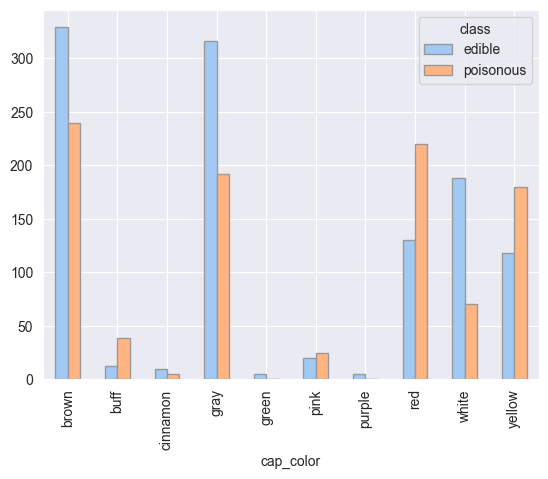

In [10]:
## для визуализации распределения наблюдений по категориям
## можно воспользоваться вот таким примером
data_train[['cap_color','class']].groupby(['cap_color', 'class']).size().unstack().plot.bar(edgecolor=".6", #log= 'y',
                                                                                            color = sns.color_palette('pastel'));
## кстати, можно объединить data_train и data_test для построения графиков и анализа

/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


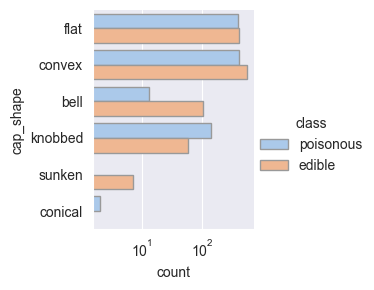

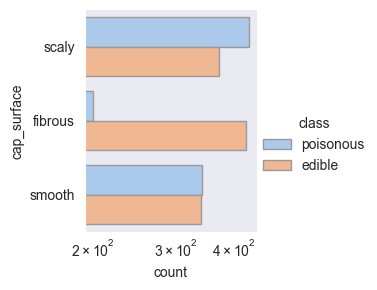

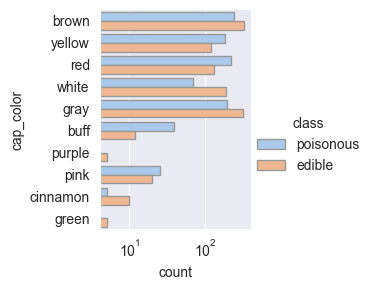

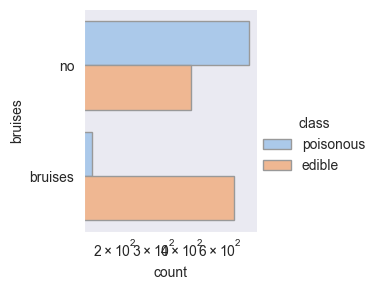

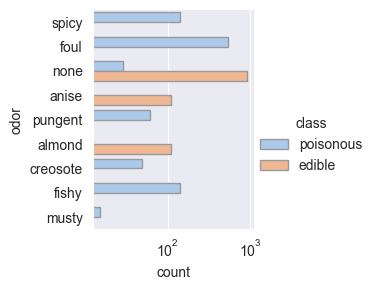

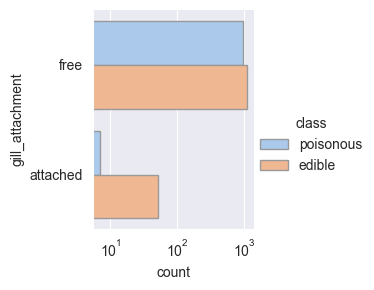

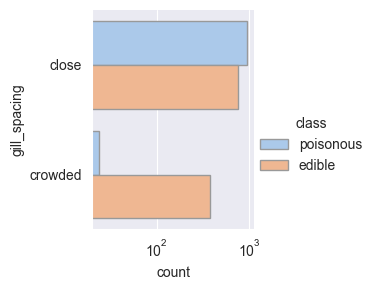

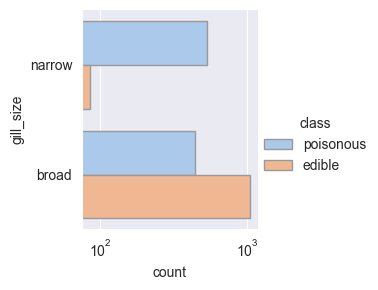

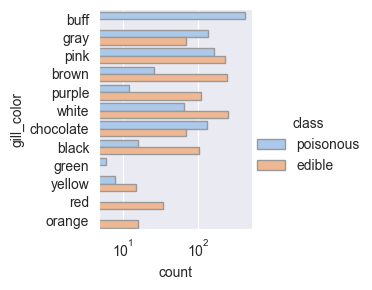

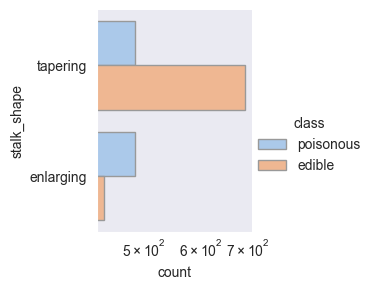

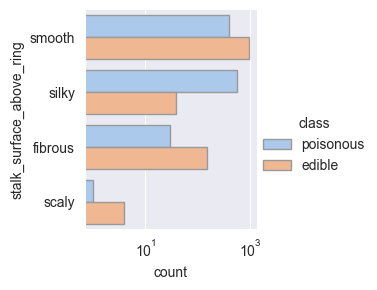

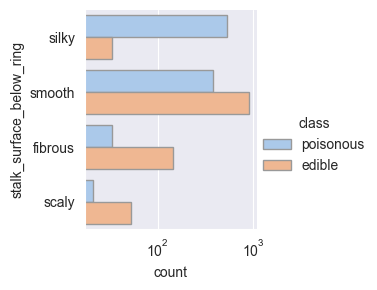

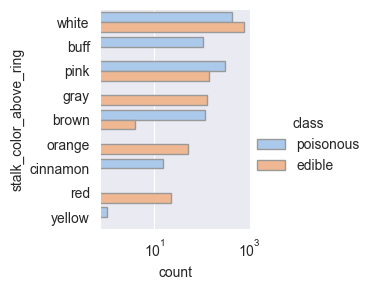

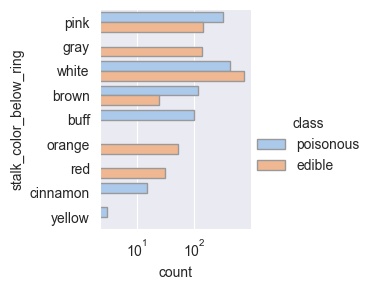

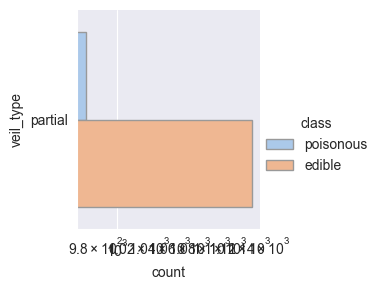

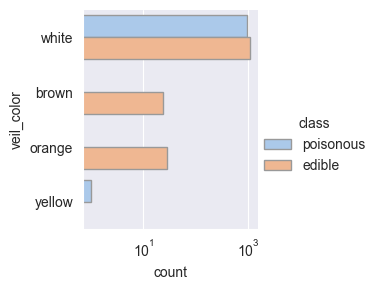

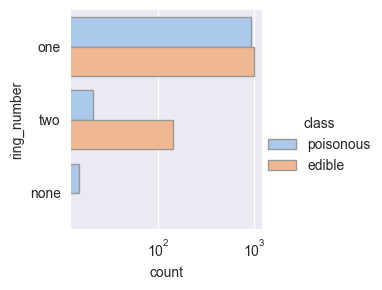

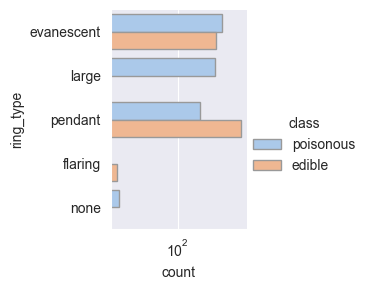

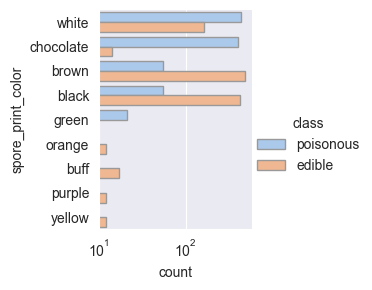

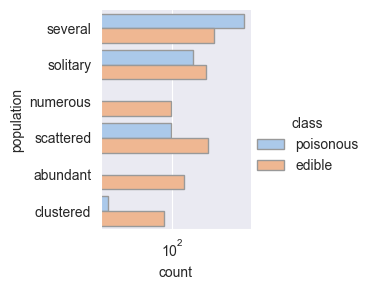

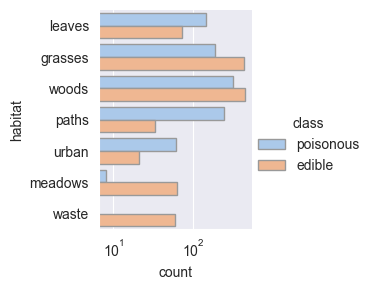

In [11]:
## или использовать seaborn.catplot
## как в этом примере:
## https://seaborn.pydata.org/tutorial/categorical.html
for col in dtc.columns[1:]:
    sns.catplot(y=col, hue="class", kind="count",
                palette="pastel", edgecolor=".6",
                data=dtc, log= 'x', height=3)

In [12]:
## необходимо преобразовать признаки.
## используйте dummy-кодирование / one-hot-кодирование
## например, с помощью sklearn.preprocessing.OneHotEncoder или pandas.get_dummies
## NB! Необходимо убедиться, что в наборе train есть все варианты значений!
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

data_train_X = pd.DataFrame(data=ohe.fit_transform(data_train.iloc[:,1:]), columns=ohe.get_feature_names_out())
# data_train_X["class"] = data_train.iloc[:,0]
data_test_X = pd.DataFrame(data=ohe.fit_transform(data_test.iloc[:,1:]), columns=ohe.get_feature_names_out())
# data_test_X["class"] = data_test.iloc[:,0]
## вот так можно добиться соответствия порядка и количества столбцов в вашем тенировочном и тестовом наборах
data_train_X, data_test_X = data_train_X.align(data_test_X, join='outer', axis=1, fill_value=0)

In [13]:
## проверьте размерность ваших данных!!! Если количество колонок не совпадает - нужно это исправить...
print(data_train_X.shape, data_test_X.shape)

(2104, 117) (947, 117)


/opt/homebrew/lib/python3.10/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


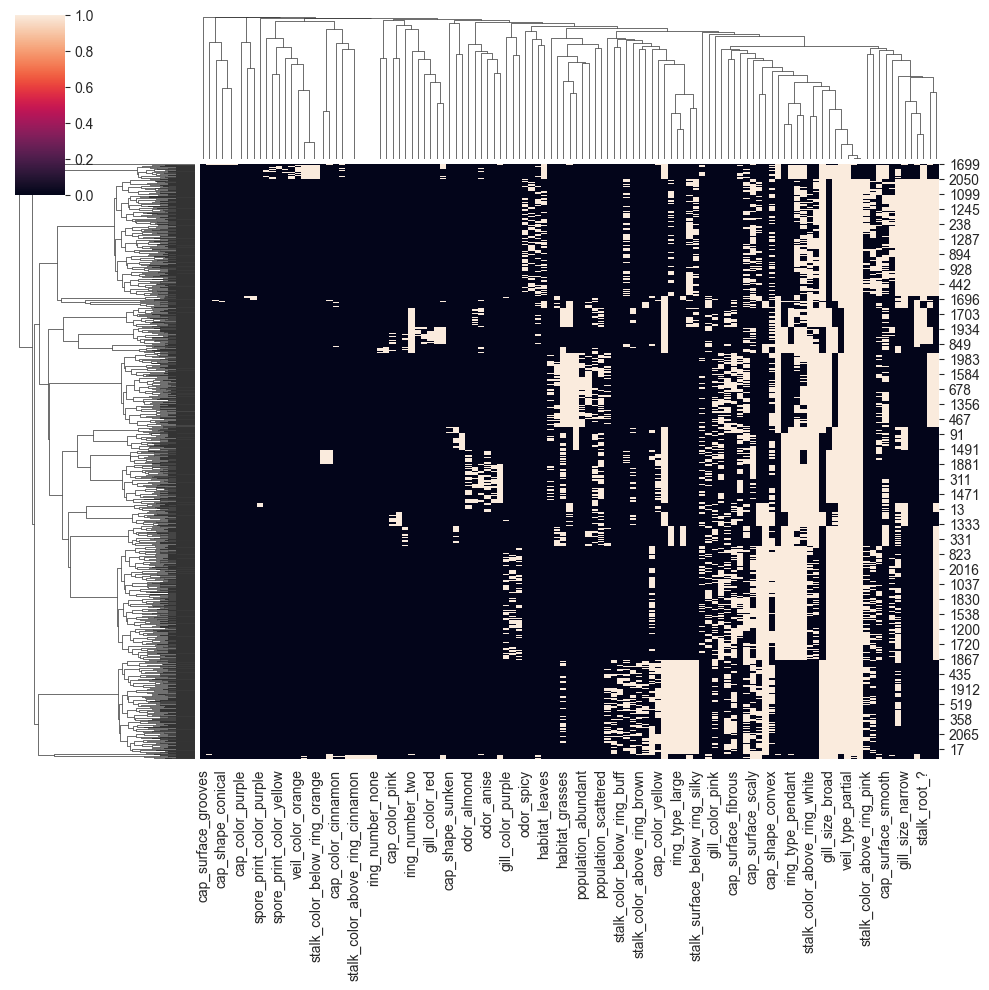

In [14]:
## интересно визуализировать наш набор данных с помощью seaborn.clustermap
## стоит отметить, что сходство/отличие образцов и признаков в нашем случае стоит оценивать с использованием ... метрики
## а, собственно, какой метрики?

## https://stats.stackexchange.com/questions/58706/distance-metrics-for-binary-vectors

# в общей форме почти все метрики для бинарных данных выдают +- одни и те же кластеры, поэтому в целом без разницы
tfdtx = data_train_X.replace(1, True).replace(0, False) # не сильно необходимо, можно срезать
sns.clustermap(
    data=tfdtx,
    metric="jaccard"
)

In [15]:
## импортируем следующие функции из scipy:
## pdist - для определения расстояний между объектами (возвращает в конденсированном виде)
## squareform - для превращения матрицы расстояний в квадратную (избыточную)
from scipy.spatial.distance import pdist, squareform

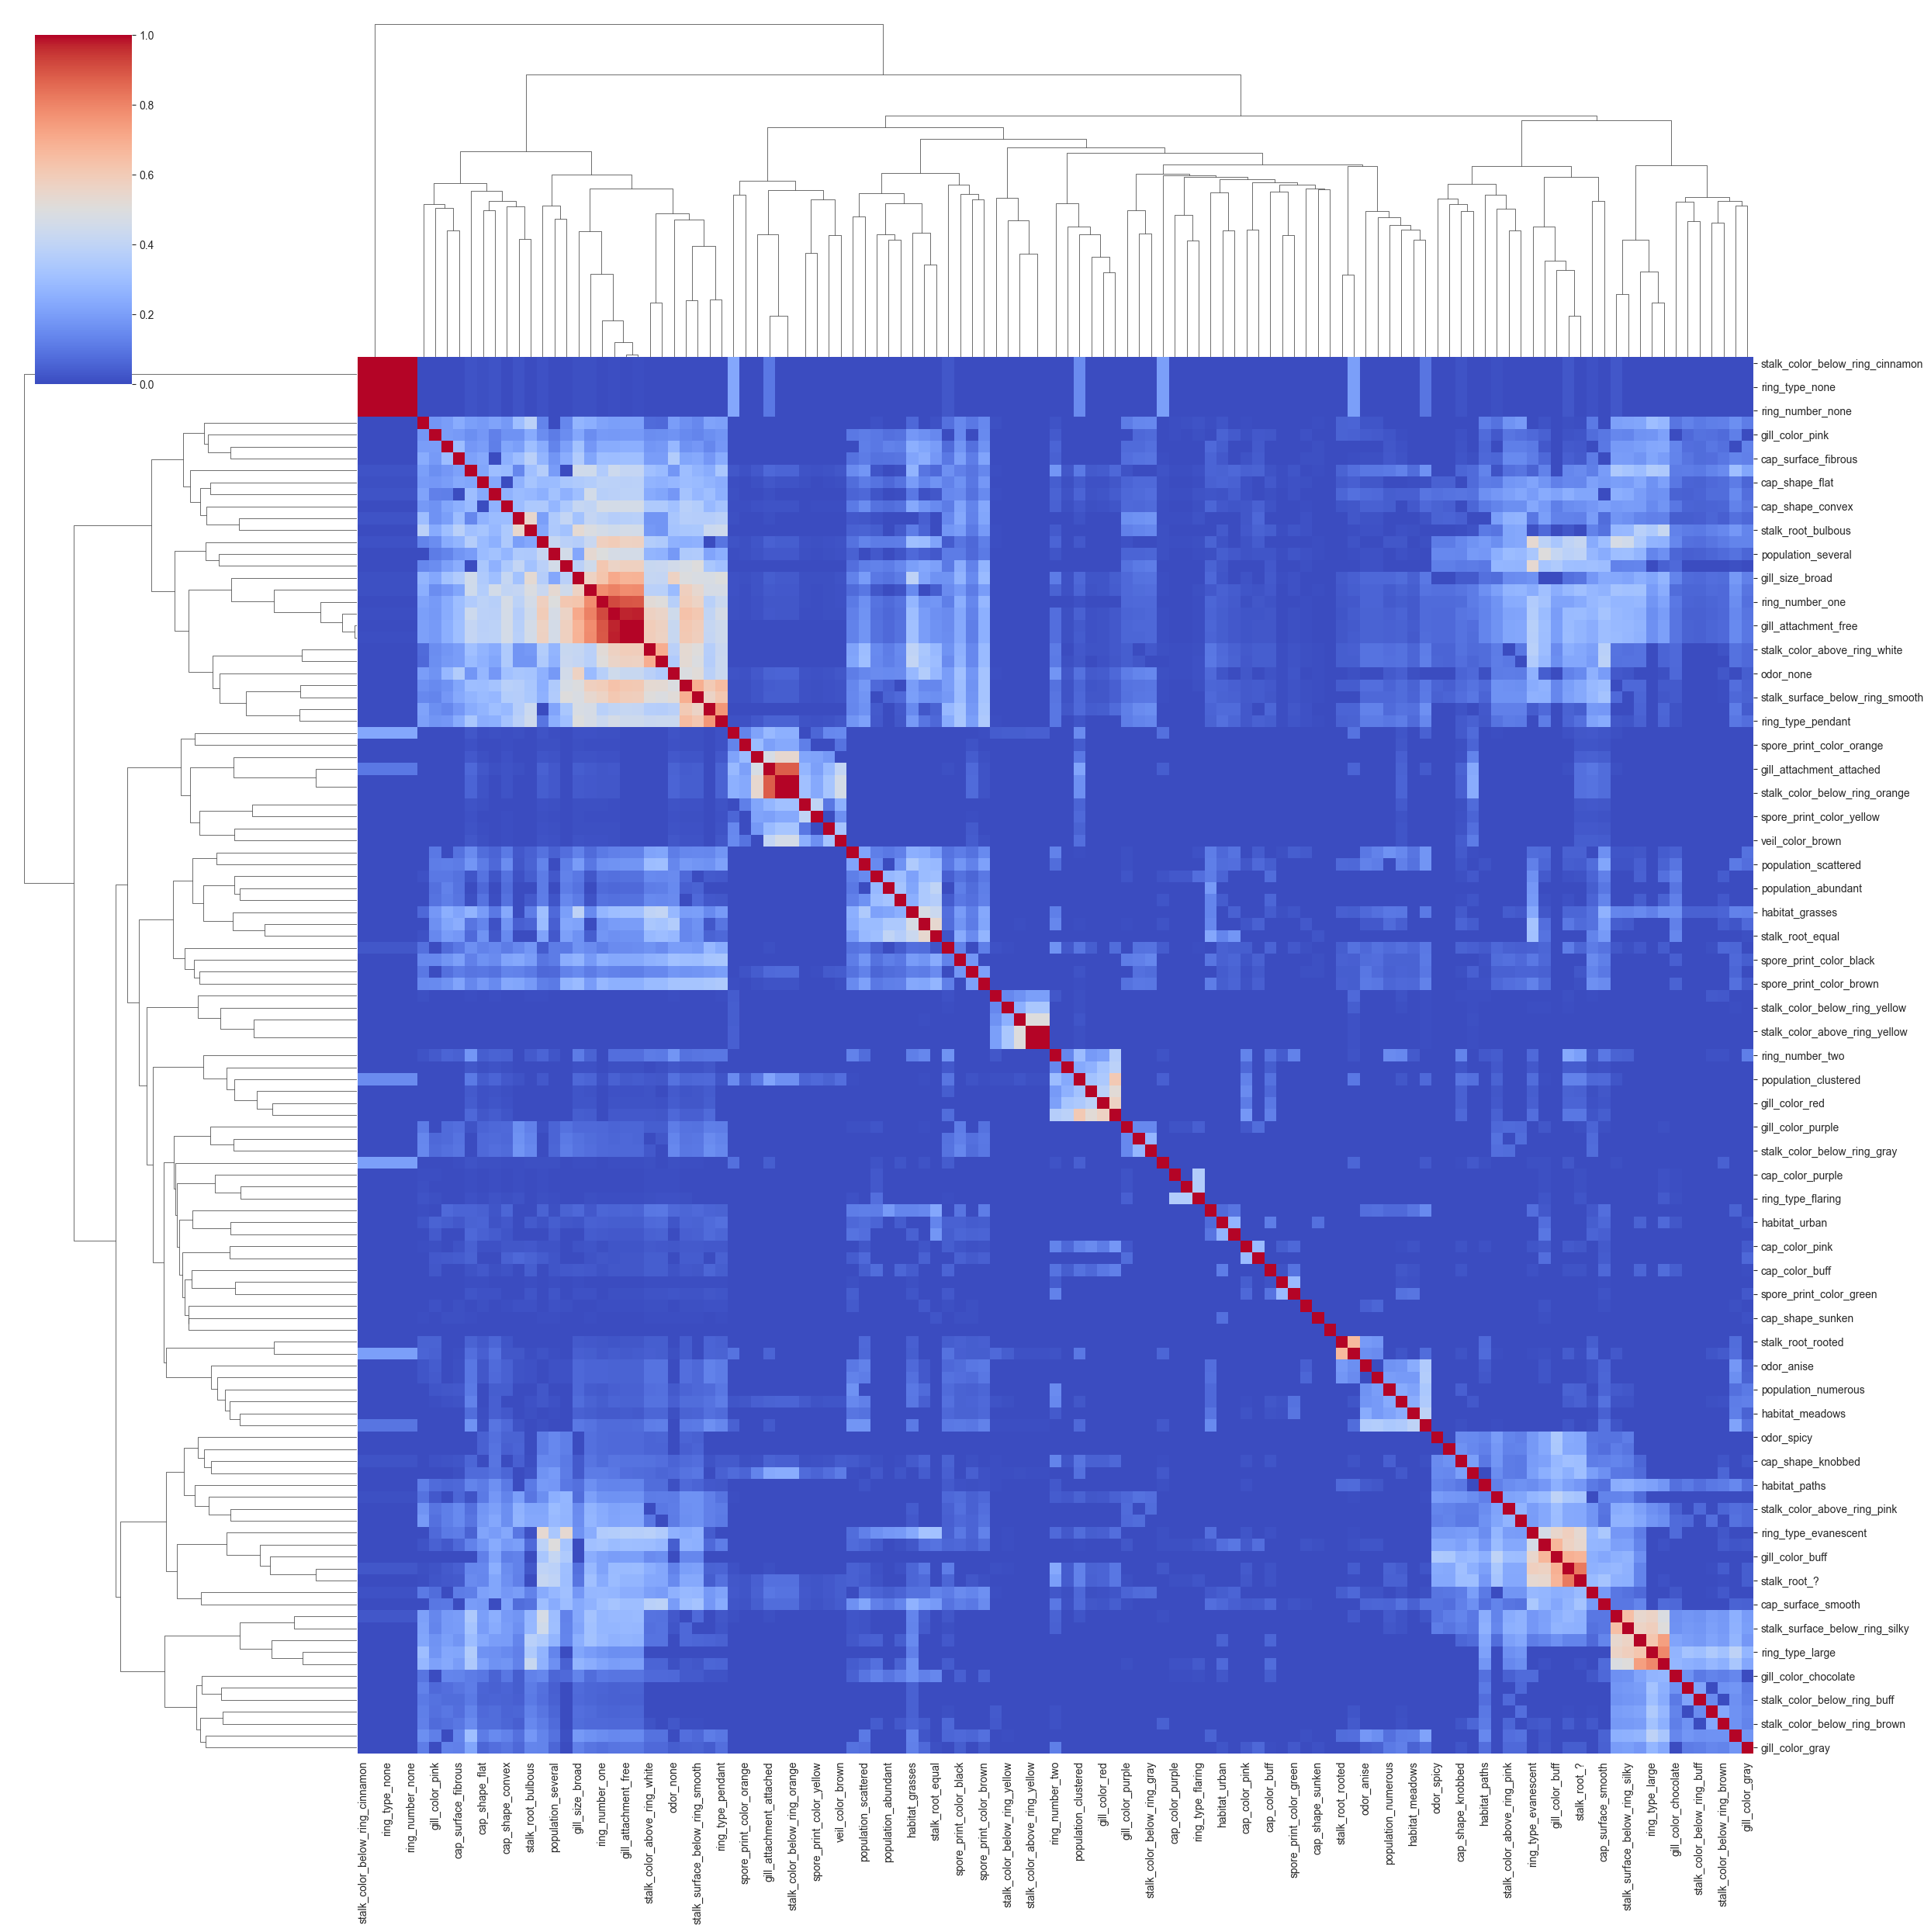

In [16]:
## Далее приведена информация из документации к scipy.spatial.distance
## можете попробовать посчитать матрицу сходства между признаками и визуализировать ее с помощью 
## seaborn.clustermap

## Computing distances over a large collection of vectors is inefficient for these functions. 
## Use pdist for this purpose.
## Distance functions between two numeric vectors u and v: 
##   braycurtis, canberra, chebyshev, cityblock, correlation, cosine, euclidean, jensenshannon, mahalanobis,
##   minkowski, seuclidean, sqeuclidean, wminkowski
## Distance functions between two boolean vectors (representing sets) u and v: 
##   dice, hamming, jaccard, kulsinski, rogerstanimoto, russellrao, sokalmichener, sokalsneath, yule



D = squareform(pdist(data_train_X.T.values, 'jaccard'))#'your_method')) ## матрица расстояний
# sns.clustermap(D)

## необходимо найти матрицу сходства

# расстояние = различие
# различие = 1 - сходство -> сходство = 1 - различие
# "инвертируем" значения, получим матрицу сходства
invert = lambda x: 1-x
D = invert(D)

# sns.clustermap(D)


## создать на ее основе pandas.DataFrame, причем задать значения индекса и колонок, 
## соответствующие новым трансформированным признакам из таблицы shrooms_trainX

Sim = pd.DataFrame(data=D, columns=data_train_X.columns, index=data_train_X.columns)

## для функции seaborn.clustermap лучше дополнительно задать следующие параметры:
# cmap = 'coolwarm', figsize = (25, 25)
sns.clustermap(Sim, cmap = 'coolwarm', figsize = (25, 25))


# Достаточно хорошо видны кластеры

In [17]:
## создадим numpy.array (или pandas.Series) с метками классов: 1 - edible, 0 - poisonous
y_train = data_train.iloc[:,0].replace({'edible': 1, 'poisonous': 0})
y_test  = data_test.iloc[:,0].replace({'edible': 1, 'poisonous': 0})

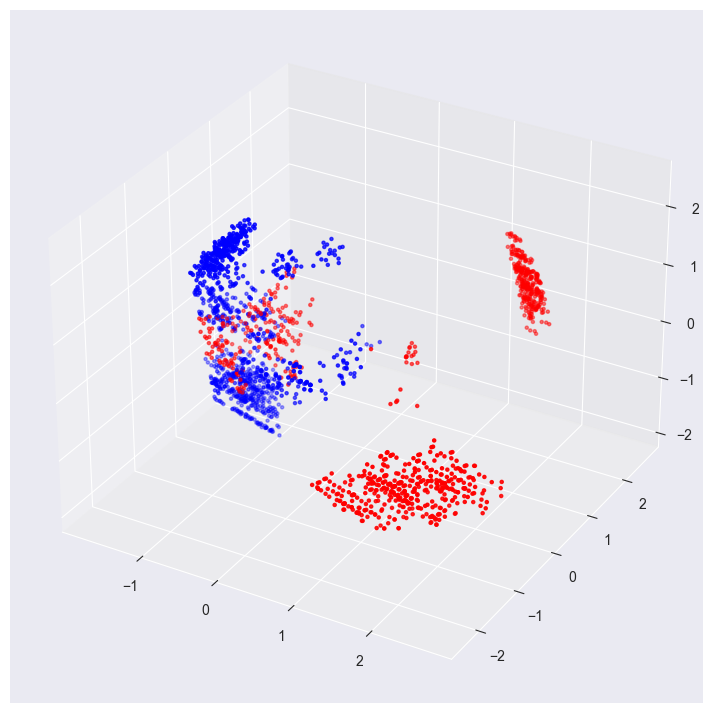

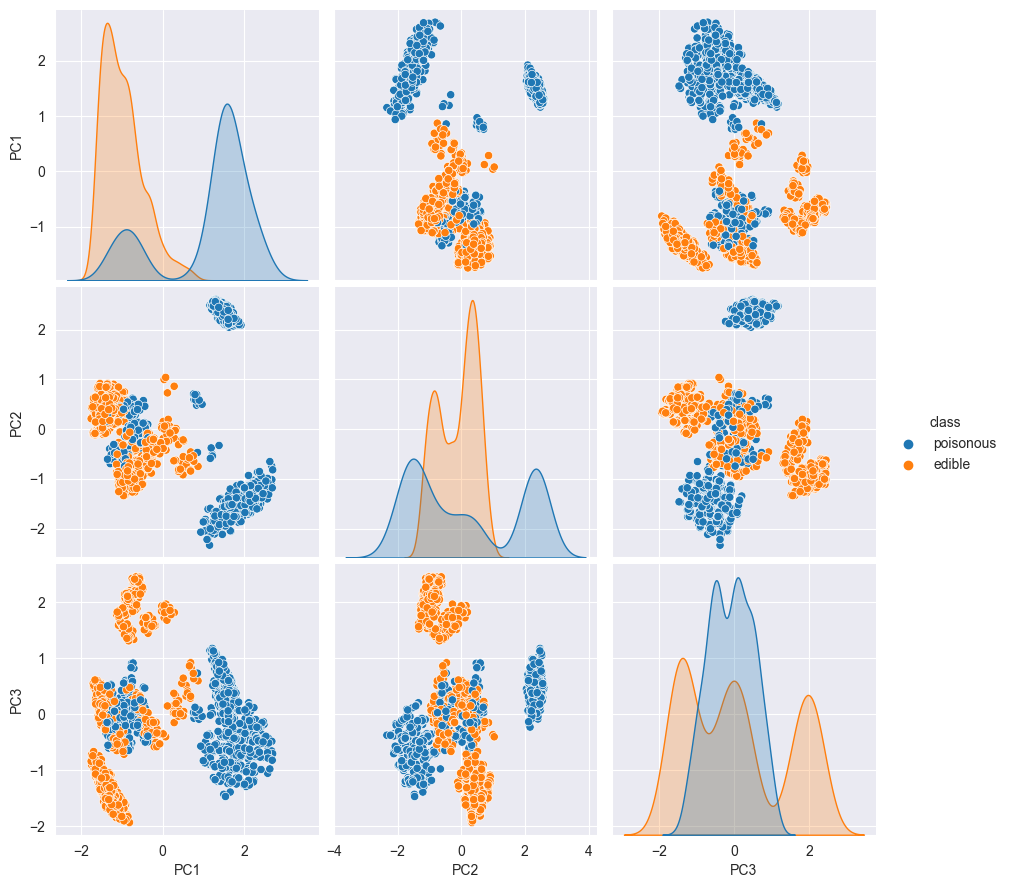

In [18]:
## проведем снижение размерности наших данных с помощью PCA, MDS или другого метода
## теперь можно построить диаграмму рассеяния для наших данных в трехмерном пространстве

pca = PCA(n_components=3)
scores = pd.DataFrame(pca.fit_transform(data_train_X), columns=["PC1", "PC2", "PC3"])

# scores
# pca.explained_variance_ratio_
# scores = <здесь должен быть ваш код>
# x, y, z = scores[:,0], scores[:,1], scores[:,2] # если scores -- numpy.array
x, y, z = scores.iloc[:,0], scores.iloc[:,1], scores.iloc[:,2] # если scores -- pandas.DataFrame

class_cols = np.where(y_train == 1, "blue", "red") # -- цвета, соответствующие меткам классов

#!!!!!!!!У меня почему-то не хочет запускаться этот график, он просто не отображается

# from mpl_toolkits.mplot3d import Axes3D ## для построения 3D-графиков
# fig = plt.figure(figsize = (9, 9)) ## зададим размер фигуры
# ax = Axes3D(fig)
#
# ax.scatter(x, y, z, color = class_cols)
#
# ax.view_init(30, 100) ## изменяя эти параметры вы меняете угол зрения
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

# А вот этот график запускается отлично
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores.PC1, scores.PC2, scores.PC3, c=class_cols, s=5)
plt.show()

scores["class"] = data_train.iloc[:,0]
sns.pairplot(data=scores, diag_kind = 'kde', diag_kws=dict(fill=True), height = 3, hue="class")


# Как можем заметить, у нас есть достаточно четко отличимые группы ядовитых и неядовитых грибов, проблема может возникнуть только с сепарацией центрального "комка"


### 3. Построение классификатора с помощью:
* логистической регрессии

In [189]:
from sklearn.metrics import classification_report

lr = LogisticRegression(
    random_state=1,
    penalty='l2',
    # C=0.001
)

kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

train_acc = []
test_acc = []

for train_index, test_index in kf.split(X=data_train_X, y=y_train):
    X_train_kf, X_test_kf = data_train_X.iloc[train_index, :], data_train_X.iloc[test_index, :]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    lr.fit(X_train_kf, y_train_kf)
    train_acc.append(lr.score(X_train_kf, y_train_kf))
    test_acc.append(lr.score(X_test_kf, y_test_kf))
print(train_acc, test_acc)
# cv_res_lr = cross_validate(lr, data_train_X, y_train, cv=10)

# print(confusion_matrix(y_test, y_pred), classification_report(y_test, y_pred))
# print(confusion_matrix(y_train, y_pred_train), classification_report(y_train, y_pred_train))

y_pred_lr = lr.predict(data_test_X)

# Какие выводы я сделал? Никаких, я так и не понял, каким макаром выходит 100% точность. На любой выборке результат подозрительно нормальный что на тесте, что на трейне...

[0.9994717379820391, 0.9989434759640782, 0.9994717379820391, 0.9994717379820391, 0.9994720168954594, 0.9994720168954594, 0.9994720168954594, 0.9994720168954594, 0.9994720168954594, 0.9994720168954594] [1.0, 0.995260663507109, 0.995260663507109, 0.995260663507109, 0.9952380952380953, 1.0, 1.0, 1.0, 1.0, 1.0]


* метода опорных векторов (для SVM важно проводить подбор гиперпараметров)

In [170]:
## лучше всего воспользоваться GridSearchCV или RandomizedSearchCV для подбора гиперпараметров
svc = SVC(random_state=1, shrinking=True)

C = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4, 1e5]
gamma = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
svc_linear = {
    'C': C,
    'kernel': ['linear']
}
svc_poly = {
    'C': C,
    'gamma': gamma,
    'degree': [1, 2, 3, 4, 5],
    'kernel': ['poly']
}
svc_others = {
    'C': C,
    'gamma': gamma,
    'kernel': ['rbf', 'sigmoid']
}
parameters = [svc_linear, svc_others, svc_poly]

gscv = GridSearchCV(
    estimator=svc,
    param_grid=parameters,
    n_jobs=-1,
    # param_distributions=param_grid,
)

search = gscv.fit(data_train_X, y_train)


In [171]:
pd.DataFrame({
    "kernel": search.cv_results_['param_kernel'],
    "C": search.cv_results_['param_C'],
    "gamma": search.cv_results_['param_gamma'],
    "degree": search.cv_results_['param_degree'],
    "score": search.cv_results_['mean_test_score'],
}).set_index(["kernel", "C", "gamma", "degree"]).sort_index()


# Тщательно посмотрев на эту таблицу глазами - пришел к выводу, что гридсерч работает, но тк все равно все скатывается в 1.0, то первое, что выдаст 1.0 и будет ответом.

# Рандомсёрч в свою очередь выдает какой-то один из вариантов с 1.0, и делает это конечно быстрее.

score
kernel  C          gamma  degree          
linear  0.001      NaN    NaN     0.899244
        0.010      NaN    NaN     0.981934
        0.100      NaN    NaN     0.996672
        1.000      NaN    NaN     1.000000
        10.000     NaN    NaN     1.000000
...                                    ...
sigmoid 100000.000 0.0001 NaN     1.000000
                   0.0010 NaN     1.000000
                   0.0100 NaN     0.999524
                   0.1000 NaN     0.861701
                   1.0000 NaN     0.646827

[450 rows x 1 columns]

In [172]:
print(search.best_params_, search.best_score_)

print(search.score(data_train_X, y_train))
print(search.score(data_test_X, y_test))
y_pred_s = search.predict(data_test_X)
print(confusion_matrix(y_test, y_pred_s), classification_report(y_test, y_pred_s))

{'C': 1, 'kernel': 'linear'} 1.0
1.0
1.0
[[461   0]
 [  0 486]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00       486

    accuracy                           1.00       947
   macro avg       1.00      1.00      1.00       947
weighted avg       1.00      1.00      1.00       947



* решающего дерева (и визуализировать дерево — необязательно)

0.9995247148288974
0.9989440337909187
[[460   1]
 [  0 486]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00       486

    accuracy                           1.00       947
   macro avg       1.00      1.00      1.00       947
weighted avg       1.00      1.00      1.00       947



[Text(0.5416666666666666, 0.9166666666666666, 'odor_none <= 0.5\ngini = 0.497\nsamples = 2104\nvalue = [971, 1133]\nclass = Edible'),
 Text(0.3333333333333333, 0.75, 'bruises_no <= 0.5\ngini = 0.305\nsamples = 1160\nvalue = [942, 218]\nclass = Toxic'),
 Text(0.25, 0.5833333333333334, 'spore_print_color_chocolate <= 0.5\ngini = 0.472\nsamples = 352\nvalue = [134, 218]\nclass = Edible'),
 Text(0.16666666666666666, 0.4166666666666667, 'odor_pungent <= 0.5\ngini = 0.342\nsamples = 279\nvalue = [61, 218]\nclass = Edible'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 218\nvalue = [0, 218]\nclass = Edible'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 61\nvalue = [61, 0]\nclass = Toxic'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]\nclass = Toxic'),
 Text(0.4166666666666667, 0.5833333333333334, 'gini = 0.0\nsamples = 808\nvalue = [808, 0]\nclass = Toxic'),
 Text(0.75, 0.75, 'spore_print_color_green <= 0.5\ngini = 0.06\nsamples = 944\nvalue

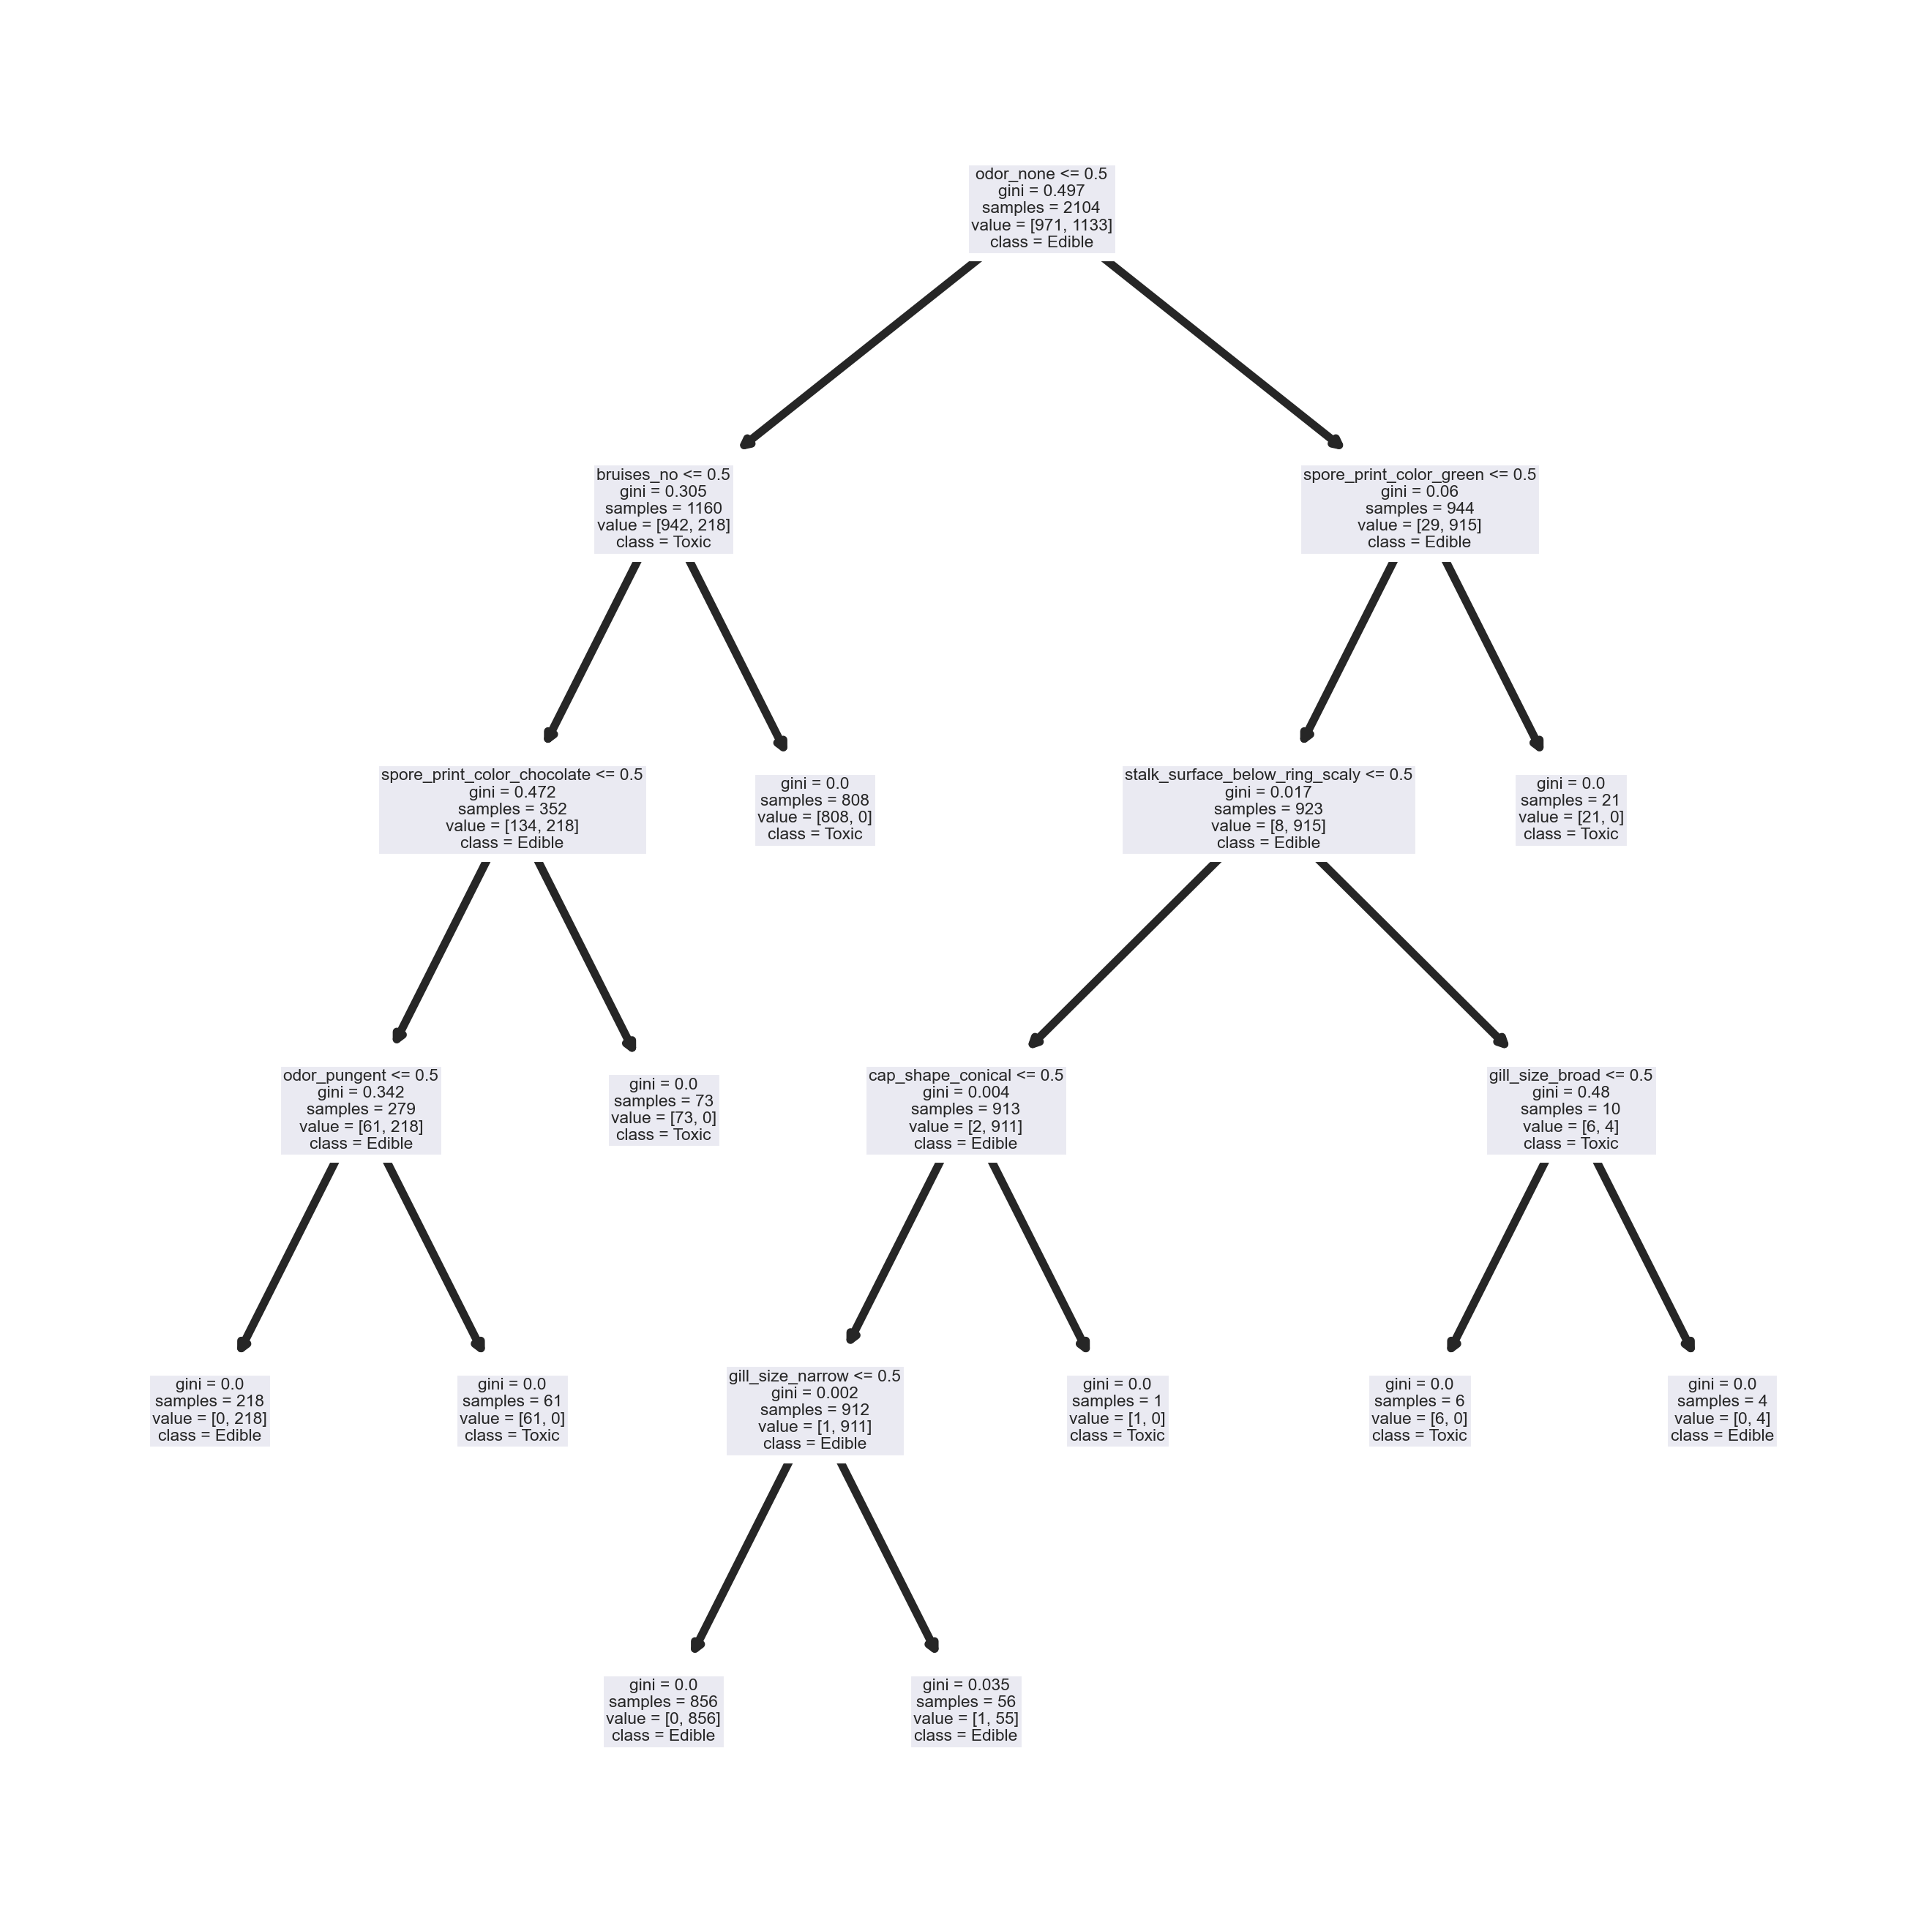

In [173]:
from sklearn import tree

dtree = DecisionTreeClassifier(max_depth=5, random_state=1) #ограничил глубину чтоб дерево на графике видно было
dtree.fit(data_train_X, y_train)
print(dtree.score(data_train_X, y_train))
print(dtree.score(data_test_X, y_test))
y_pred_tree = dtree.predict(data_test_X)
print(confusion_matrix(y_test, y_pred_tree), classification_report(y_test, y_pred_tree))


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dtree, feature_names=data_train_X.columns, class_names=["Toxic", "Edible"])

* градиентного бустинга (или RandomForestClassifier, ExtraTreesClassifier)

In [174]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=1, n_estimators=100) # как для дерева так и для леса можно подобрать Оптимальные параметры глубины/листьев/фичей для скорости работы
rfc.fit(data_train_X, y_train)

print(rfc.score(data_train_X, y_train))
print(rfc.score(data_test_X, y_test))
y_pred_forest = rfc.predict(data_test_X)
print(confusion_matrix(y_test, y_pred_forest), classification_report(y_test, y_pred_forest))

1.0
1.0
[[461   0]
 [  0 486]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00       486

    accuracy                           1.00       947
   macro avg       1.00      1.00      1.00       947
weighted avg       1.00      1.00      1.00       947



### 4. Подбор оптимальных параметров (для SVM)

In [175]:
# <здесь должен быть ваш код> ## Пример - в ноутбуке с последнего занятия.

# Предполагаю, что этот подбор я уже сделал, поэтому поле пустое

### 5. Оценка качества полученных моделей с использованием тестового набора 
* Accuracy, ROC AUC, построить графики для визуализации качества предсказаний

||NAME: (ACCURACY, ROC AUC)|| 
Logistic:  (0.9978880675818373, 0.9978308026030368) 
SVC:  (1.0, 1.0) 
Tree:  (0.9989440337909187, 0.9989154013015185) 
Forest:  (1.0, 1.0)


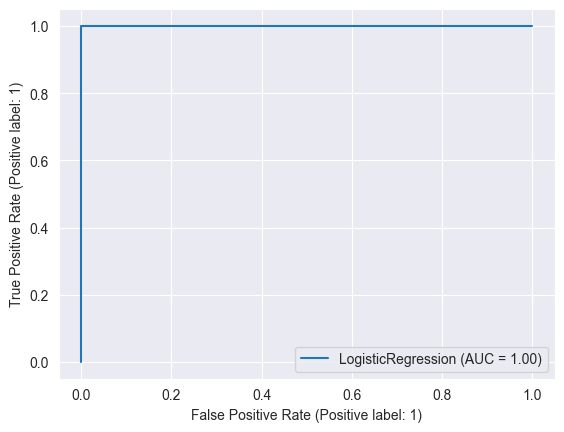

In [194]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, data_test_X, y_test) # ситуация очевидная выходит - в каждом классификаторе просто прямой угол. Можно попробовать как в прошлой домашке просто перебором некоторого threshold, которого тут по факту нет, и нужно видимо брать просто один из гиперпараметров для перебора и визуализации (что делать я конечно же не буду, потому что график очевиден)

def acc_roc_auc (y_pred):
    return accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred)

print("||NAME: (ACCURACY, ROC AUC)||",
      "\nLogistic: ", acc_roc_auc(y_pred_lr),
      "\nSVC: ", acc_roc_auc(y_pred_s),
      "\nTree: ", acc_roc_auc(y_pred_tree),
      "\nForest: ", acc_roc_auc(y_pred_forest))

### 6. Оцените важность признаков

<AxesSubplot: >

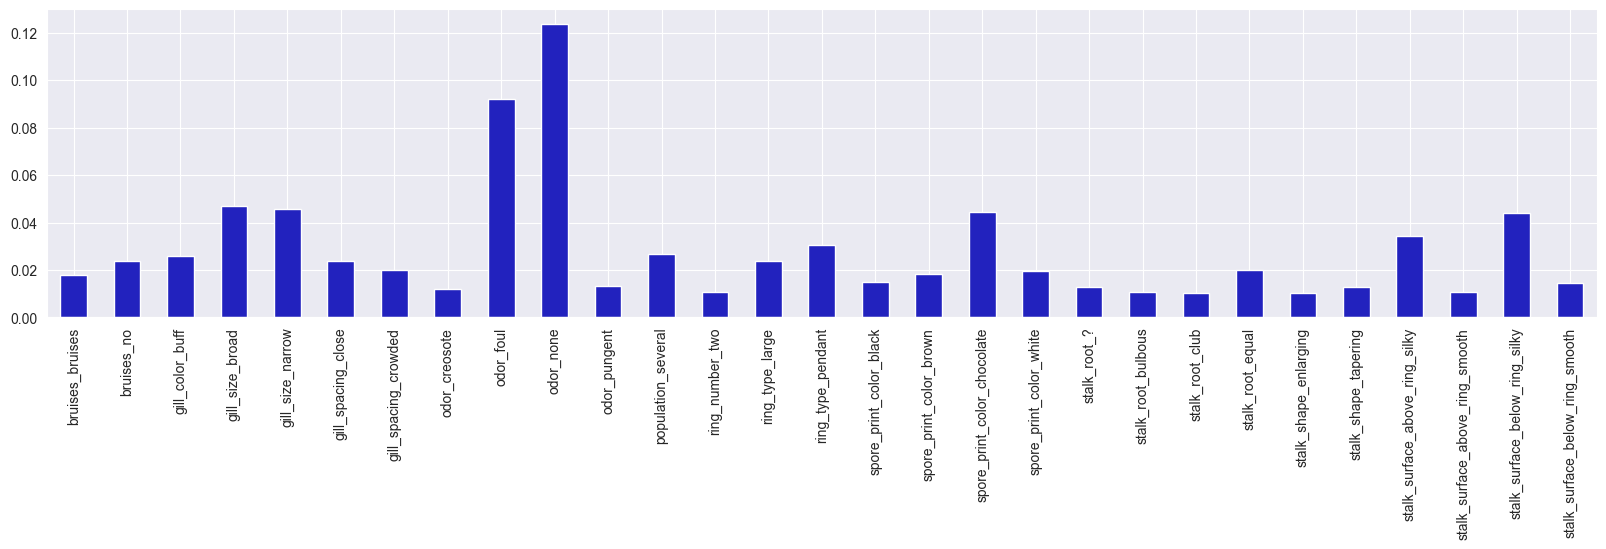

In [166]:
# Из семинара я выяснил, что можно оценить через рандомный лес

importance = pd.Series(
    data=rfc.feature_importances_,
    index=data_train_X.columns
)
# Сразу можно фильтрануть незначительные признаки
importance[importance>0.01].plot(
    kind  ='bar',
    color = '#2222be',
    figsize = (20, 4)
)

В завершение всего этого хочу сказать - мне не понравился грибной датасет(
Не видно ни недообучения, ни переобучения, всё выходит 100% на любой выборке из представленных данных.

Все еще подозреваю, что я делаю что-то не так конечно, но уже смирился и понял что это датасет такой.